In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

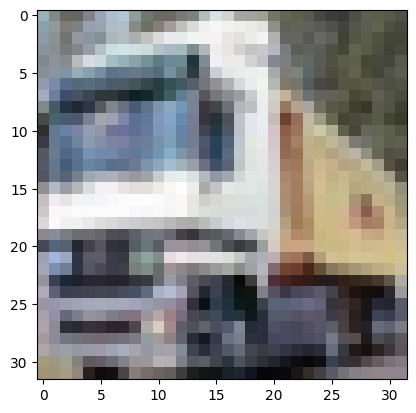

In [6]:
plt.imshow(X_train[1])

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
# Assuming y_train is a NumPy array
num_unique_elements = len(np.unique(y_train))
print(num_unique_elements)

10


In [9]:
X_train = X_train/255.0
X_test = X_test/255.0


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Using ANN

In [11]:
ann = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten 32*32*3 images into 1D vector
    Dense(3000, activation='relu'), # First hidden layer
    Dense(1000, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])


C:\Users\yashk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
ann.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',   # or use gradient descent
    metrics=['accuracy']
)


In [13]:
history = ann.fit(
    X_train, y_train,
    epochs=5,             # Train for 10 epochs
    batch_size=32          # Use batches of 32 samples
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 85ms/step - accuracy: 0.2753 - loss: 2.1875
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.3962 - loss: 1.6781
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.4320 - loss: 1.5751
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.4580 - loss: 1.5223
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.4703 - loss: 1.4816


In [14]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4606 - loss: 1.5089


[1.5127625465393066, 0.454800009727478]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [18]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print ("classification Report", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
classification Report               precision    recall  f1-score   support

           0       0.55      0.43      0.48      1000
           1       0.61      0.55      0.58      1000
           2       0.30      0.47      0.37      1000
           3       0.34      0.24      0.28      1000
           4       0.49      0.29      0.36      1000
           5       0.35      0.44      0.39      1000
           6       0.45      0.57      0.50      1000
           7       0.60      0.41      0.49      1000
           8       0.47      0.74      0.57      1000
           9       0.59      0.41      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.45     10000
weighted avg       0.48      0.45      0.45     10000



## Using CNN


In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [24]:
cnn = Sequential([
    
    # cnn + relu #1
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    
    #2
    Conv2D(filters = 32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    # Dense
    Flatten(),  
    Dense(64, activation='relu'), # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])


C:\Users\yashk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',   # or use gradient descent
    metrics=['accuracy']
)


In [28]:
history1 = cnn.fit(
    X_train, y_train,
    epochs=15,             # Train for 10 epochs
    batch_size=32          # Use batches of 32 samples
)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6872 - loss: 0.8891
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7006 - loss: 0.8433
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7194 - loss: 0.8039
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7288 - loss: 0.7700
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7409 - loss: 0.7296
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7477 - loss: 0.7115
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7580 - loss: 0.6814
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7694 - loss: 0.6494
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7718 - loss: 0.6367
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7816 - loss: 0.6107
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7886 - loss: 0.5970
Epoch 12/15
1563/15

In [29]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6861 - loss: 1.0261


[1.0419217348098755, 0.6840000152587891]

In [30]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
y_pred

array([[1.0748232e-03, 1.5753795e-03, 3.2806231e-03, ..., 2.0142330e-03,
        6.7090341e-03, 2.2880738e-03],
       [1.6055198e-03, 8.9125827e-02, 8.3524739e-08, ..., 3.4669567e-09,
        9.0841091e-01, 8.5756480e-04],
       [4.0928409e-02, 3.7497990e-02, 7.9971121e-04, ..., 9.6161303e-04,
        8.6568463e-01, 5.1026244e-02],
       ...,
       [1.7554683e-07, 1.1653600e-06, 1.9108087e-01, ..., 2.7887167e-03,
        2.0085030e-05, 1.8421913e-08],
       [6.3075846e-01, 2.3971935e-01, 4.6967506e-02, ..., 1.4210265e-03,
        5.9184356e-05, 5.1553437e-04],
       [1.7280273e-07, 4.7517599e-09, 3.4573253e-03, ..., 9.8072386e-01,
        1.3332054e-08, 2.2702652e-08]], dtype=float32)

In [38]:
y_test = y_test.reshape(-1,)

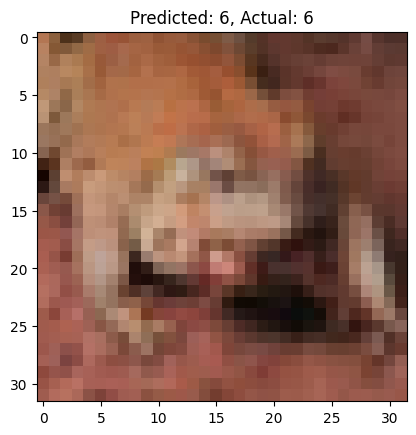

In [44]:
sample_index = 5

plt.imshow(X_test[sample_index])
plt.title(f"Predicted: {tf.argmax(y_pred[sample_index])}, Actual: {y_test[sample_index]}")
plt.show()
